<font style="font-size:24px; font-weight:bold; color:red;"><b><i >                                 1 . Importation des données actives<i><b><font>

La puissance militaire d'un pays peut être importante pour plusieurs raisons

Cette dataset, Décrit 140 pays selon les 15 variables suivantes

- Country : Nom du pays

- Defense Budget : est l'ensemble des dépenses publiques consacrées à la défense nationale,

- Active Personnel : Le personnel actif désigne généralement les personnes qui font partie 
                     des forces armées d'un pays et qui sont directement impliquées dans les opérations militaires. 

- Reserve Personnel : désigne généralement les personnes qui ont été formées
                         et sont prêtes à être appelées en cas de besoin pour renforcer les forces armées d'un pays
- Paramilitary : Les forces paramilitaires sont des forces de sécurité organisées et    
                    armées qui sont généralement sous la direction du gouvernement d'un pays, mais qui ne font pas partie des forces armées régulières.

- Aircraft Carriers : Un porte-avions est un navire de guerre conçu pour lancer et atterrir des avions. 



In [2]:
import pandas as pd
import numpy
import scipy
import seaborn as sns
from fanalysis.ca import CA
import matplotlib.pyplot as plt

In [3]:
# Lire le fichier CSV et créer un DataFrame pandas à partir de ses données
power = pd.read_csv("global firepower 2022.csv")

# Définir le nom du pays comme index du DataFrame
power = power.set_index("country")

# Trier le DataFrame par ordre décroissant en fonction du budget de défense de chaque pays
power = power.sort_values(by='Defense Budget', ascending=False)

# Afficher le DataFrame résultant
power

,Defense Budget,Active Personnel,Reserve Personnel,Paramilitary,Aircraft Carriers,Tanks,Self-Propelled Artillery,Armored Vehicles,Helicopters,Fighters/Interceptors,Destroyers,Navy Ships,Submarines,Total Aircraft Strength
country,,,,,,,,,,,,,,
United States,770000000000,1390000,442000,0,11,6612,1498,45193,5463,13247,92,484,68,13247
China,250240000000,2000000,510000,624000,2,5250,4120,35000,912,3285,41,777,79,3285
Russia,154000000000,850000,250000,250000,1,12420,6574,30122,1543,4173,15,605,70,4173
United Kingdom,68000000000,194000,37000,0,2,227,89,5015,235,693,6,75,10,693
Germany,50300000000,184000,15000,0,0,266,121,9217,287,617,0,80,6,617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Central African Republic,41454000,10000,0,1000,0,3,0,89,1,3,0,0,0,3
Laos,38280000,25000,0,50000,0,130,34,200,27,32,0,39,0,32
Bhutan,28908000,8000,0,0,0,0,0,27,2,2,0,0,0,2


"Ce code visualise les 6 pays ayant les plus hautes valeurs pour chaque variable, en utilisant des diagrammes en secteur qui affichent le pourcentage de chaque pays pour chaque variable.

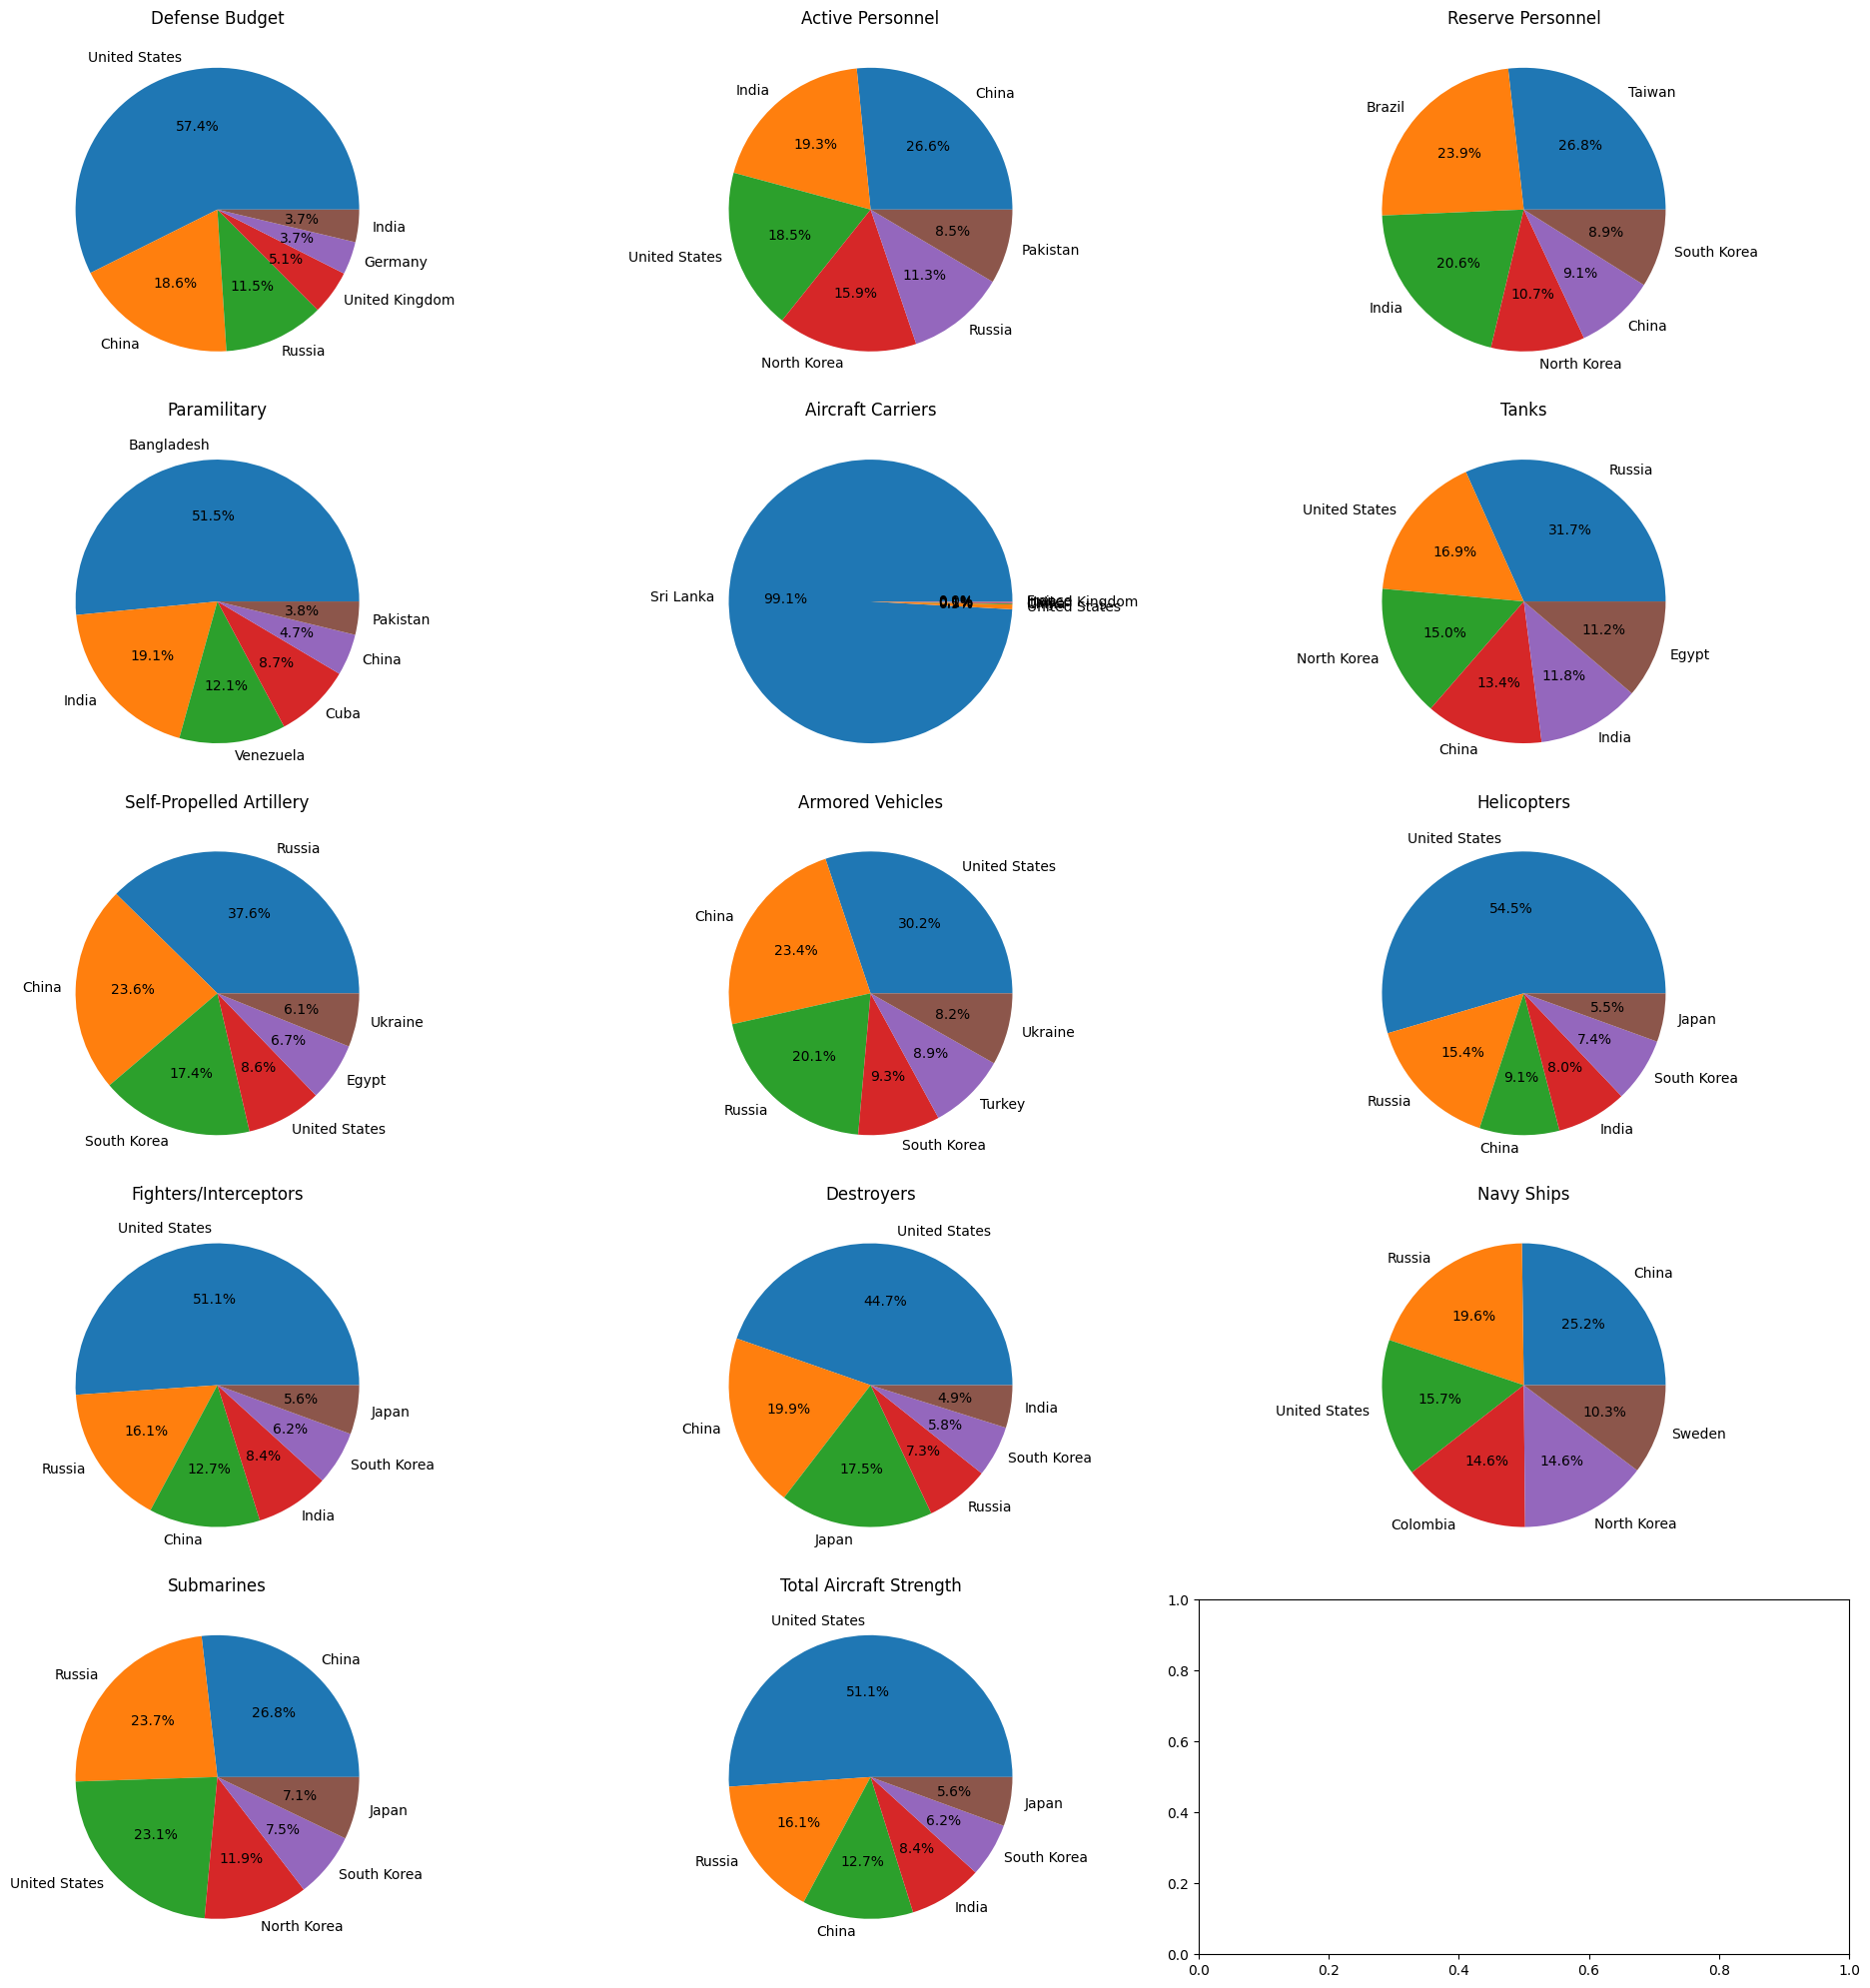

In [4]:
import math

# Calculate the number of rows and columns needed for the subplots
ncols = 3
nrows = math.ceil(len(power.columns) / ncols)

# Create the figure and axes objects for the subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))

# Flatten the 2D array of axes objects to a 1D array
axs = axs.flatten()

# Iterate over the columns in the DataFrame
for ax, col in zip(axs, power.columns):
    # Triez les valeurs de la colonne par ordre décroissant
    values = power[col].sort_values(ascending=False)
    
    # Gardez seulement les 6 premières valeurs
    values = values[:6]
    
    # Obtenez les étiquettes correspondantes
    labels = values.index
    
    # Tracez le graphique sectoriel
    ax.pie(values, labels=labels, autopct='%2.1f%%')
    ax.set_title(col)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


In [5]:
#dimension
print(power.shape) 

#nombre d'observations
n = power.shape[0]

#nombre de variables
p = power.shape[1]

(140, 14)


La méthode "info" de pandas permet d'obtenir des informations sur un DataFrame, telles que le nombre de lignes et de colonnes, le type de données de chaque colonne, le nombre de valeurs non nulles et la mémoire occupée par le DataFrame.

In [6]:
power.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, United States to Liberia
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Defense Budget            140 non-null    int64
 1   Active Personnel          140 non-null    int64
 2   Reserve Personnel         140 non-null    int64
 3   Paramilitary              140 non-null    int64
 4   Aircraft Carriers         140 non-null    int64
 5   Tanks                     140 non-null    int64
 6   Self-Propelled Artillery  140 non-null    int64
 7   Armored Vehicles          140 non-null    int64
 8   Helicopters               140 non-null    int64
 9   Fighters/Interceptors     140 non-null    int64
 10  Destroyers                140 non-null    int64
 11  Navy Ships                140 non-null    int64
 12  Submarines                140 non-null    int64
 13  Total Aircraft Strength   140 non-null    int64
dtypes: int64(14)
memory usage: 16.4

Dans ce cas, la fonction "pairplot" est utilisée pour visualiser les relations entre les variables du DataFrame "power". Cela permet de voir comment chaque variable est liée aux autres et de découvrir des patterns éventuels dans les données. Les graphiques créés peuvent être des scatterplots pour les variables quantitatives

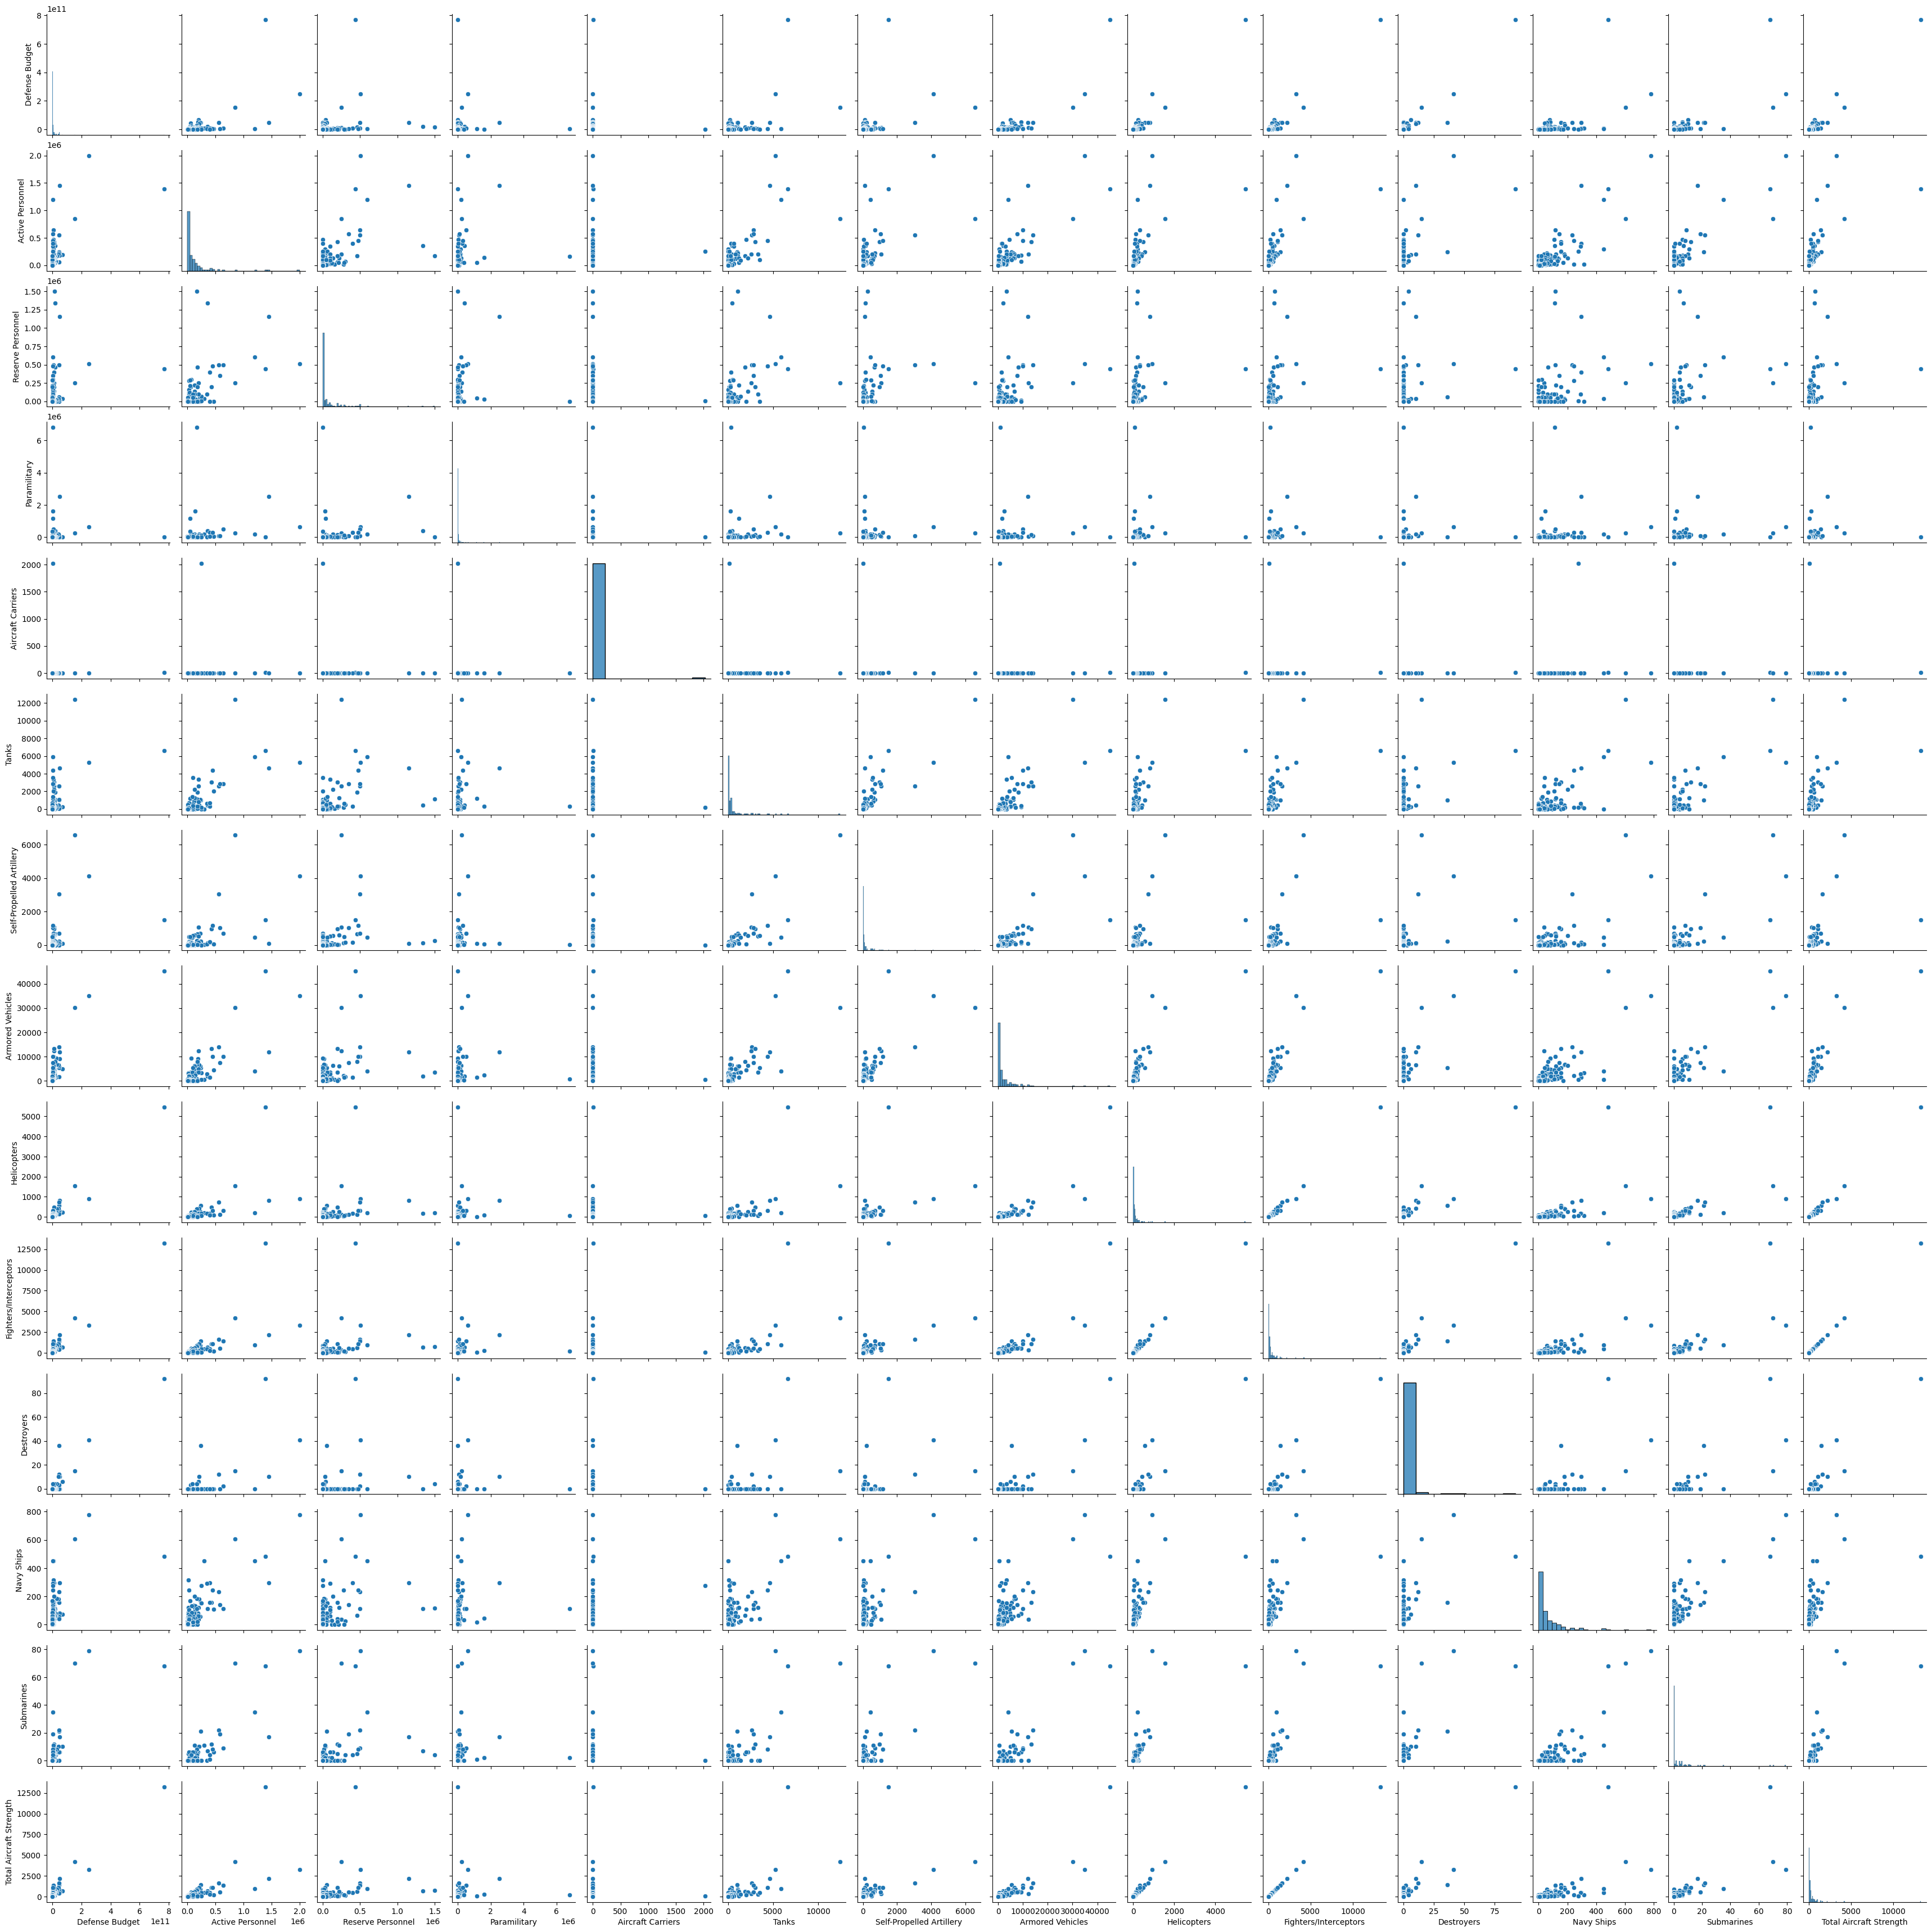

In [7]:
import seaborn as sns
sns.pairplot(power)

<FONT COLOR="grenn"><B>calculer la moyenne de chaque colonne  <B> <FONT> 

In [8]:
# Calculate the mean of each column
means = power.mean()

means_dic = means.to_dict()

max_key_length = max(len(k) for k in means_dic.keys())

for k, v in means_dic.items():
    print(f"{k.rjust(max_key_length)}: {v}")

          Defense Budget: 14474916902.62857
        Active Personnel: 137857.85714285713
       Reserve Personnel: 91921.42857142857
            Paramilitary: 129951.07142857143
       Aircraft Carriers: 14.592857142857143
                   Tanks: 663.2642857142857
Self-Propelled Artillery: 221.88571428571427
        Armored Vehicles: 2770.4285714285716
             Helicopters: 141.44285714285715
   Fighters/Interceptors: 378.75714285714287
              Destroyers: 1.707142857142857
              Navy Ships: 75.27857142857142
              Submarines: 3.657142857142857
 Total Aircraft Strength: 378.75714285714287


<FONT COLOR="grenn"><B>calculer les écarts-type <B> <FONT> 

In [9]:
#ecart_type
ecatre_type=power.std()

ecatre_type_dic = ecatre_type.to_dict()

max_key_length = max(len(k) for k in ecatre_type_dic.keys())

for k, v in ecatre_type_dic.items():
    print(f"{k.rjust(max_key_length)}: {v}")

          Defense Budget: 69681192631.33238
        Active Personnel: 279003.48959109496
       Reserve Personnel: 224482.18810169087
            Paramilitary: 632732.1459117332
       Aircraft Carriers: 170.88023895032586
                   Tanks: 1541.5859282748015
Self-Propelled Artillery: 728.332224037512
        Armored Vehicles: 5907.143028964631
             Helicopters: 491.5391371293924
   Fighters/Interceptors: 1222.9321579295608
              Destroyers: 9.174171147217487
              Navy Ships: 119.58074649874159
              Submarines: 11.368118633899327
 Total Aircraft Strength: 1222.9321579295608


<FONT COLOR="grenn"><B>calculer la matrice centrée de notre data<B> <FONT> 

In [10]:
pd.set_option('display.float_format', '{:.6f}'.format)
power_centre=power-means
power_centre

,Defense Budget,Active Personnel,Reserve Personnel,Paramilitary,Aircraft Carriers,Tanks,Self-Propelled Artillery,Armored Vehicles,Helicopters,Fighters/Interceptors,Destroyers,Navy Ships,Submarines,Total Aircraft Strength
country,,,,,,,,,,,,,,
United States,755525083097.371460,1252142.142857,350078.571429,-129951.071429,-3.592857,5948.735714,1276.114286,42422.571429,5321.557143,12868.242857,90.292857,408.721429,64.342857,12868.242857
China,235765083097.371429,1862142.142857,418078.571429,494048.928571,-12.592857,4586.735714,3898.114286,32229.571429,770.557143,2906.242857,39.292857,701.721429,75.342857,2906.242857
Russia,139525083097.371429,712142.142857,158078.571429,120048.928571,-13.592857,11756.735714,6352.114286,27351.571429,1401.557143,3794.242857,13.292857,529.721429,66.342857,3794.242857
United Kingdom,53525083097.371429,56142.142857,-54921.428571,-129951.071429,-12.592857,-436.264286,-132.885714,2244.571429,93.557143,314.242857,4.292857,-0.278571,6.342857,314.242857
Germany,35825083097.371429,46142.142857,-76921.428571,-129951.071429,-14.592857,-397.264286,-100.885714,6446.571429,145.557143,238.242857,-1.707143,4.721429,2.342857,238.242857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Central African Republic,-14433462902.628571,-127857.857143,-91921.428571,-128951.071429,-14.592857,-660.264286,-221.885714,-2681.428571,-140.442857,-375.757143,-1.707143,-75.278571,-3.657143,-375.757143
Laos,-14436636902.628571,-112857.857143,-91921.428571,-79951.071429,-14.592857,-533.264286,-187.885714,-2570.428571,-114.442857,-346.757143,-1.707143,-36.278571,-3.657143,-346.757143
Bhutan,-14446008902.628571,-129857.857143,-91921.428571,-129951.071429,-14.592857,-663.264286,-221.885714,-2743.428571,-139.442857,-376.757143,-1.707143,-75.278571,-3.657143,-376.757143


<FONT COLOR="grenn"><B>calculer La matrice centrée réduite de notre data<B> <FONT> 

In [11]:
power_centered_reduced = (power - means) / ecatre_type
power_centered_reduced

,Defense Budget,Active Personnel,Reserve Personnel,Paramilitary,Aircraft Carriers,Tanks,Self-Propelled Artillery,Armored Vehicles,Helicopters,Fighters/Interceptors,Destroyers,Navy Ships,Submarines,Total Aircraft Strength
country,,,,,,,,,,,,,,
United States,10.842597,4.487909,1.559494,-0.205381,-0.021026,3.858841,1.752105,7.181572,10.826314,10.522450,9.842072,3.417953,5.659939,10.522450
China,3.383482,6.674261,1.862413,0.780818,-0.073694,2.975336,5.352110,5.456034,1.567641,2.376455,4.282987,5.868181,6.627557,2.376455
Russia,2.002335,2.552449,0.704192,0.189731,-0.079546,7.626390,8.721452,4.630254,2.851364,3.102578,1.448944,4.429822,5.835870,3.102578
United Kingdom,0.768142,0.201224,-0.244658,-0.205381,-0.073694,-0.282997,-0.182452,0.379976,0.190335,0.256959,0.467929,-0.002330,0.557951,0.256959
Germany,0.514128,0.165382,-0.342662,-0.205381,-0.085398,-0.257698,-0.138516,1.091318,0.296125,0.194813,-0.186081,0.039483,0.206090,0.194813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Central African Republic,-0.207136,-0.458266,-0.409482,-0.203800,-0.085398,-0.428302,-0.304649,-0.453930,-0.285721,-0.307259,-0.186081,-0.629521,-0.321702,-0.307259
Laos,-0.207181,-0.404503,-0.409482,-0.126358,-0.085398,-0.345919,-0.257967,-0.435139,-0.232826,-0.283546,-0.186081,-0.303381,-0.321702,-0.283546
Bhutan,-0.207316,-0.465435,-0.409482,-0.205381,-0.085398,-0.430248,-0.304649,-0.464426,-0.283686,-0.308077,-0.186081,-0.629521,-0.321702,-0.308077


<FONT COLOR="grenn"><B>verifier que la moyenne de chaque colonne =0 <B> <FONT>


In [12]:
mean__centered_reduced=power_centered_reduced.mean()
mean__centered_reduced

Defense Budget              0.000000
Active Personnel            0.000000
Reserve Personnel           0.000000
Paramilitary               -0.000000
Aircraft Carriers          -0.000000
Tanks                      -0.000000
Self-Propelled Artillery    0.000000
Armored Vehicles           -0.000000
Helicopters                 0.000000
Fighters/Interceptors       0.000000
Destroyers                 -0.000000
Navy Ships                  0.000000
Submarines                  0.000000
Total Aircraft Strength     0.000000
dtype: float64

<FONT COLOR="grenn"><B>verifier que les écarts-type unitaires.<B> <FONT> 

In [13]:
ecart__centered_reduced=power_centered_reduced.std()
ecart__centered_reduced

Defense Budget             1.000000
Active Personnel           1.000000
Reserve Personnel          1.000000
Paramilitary               1.000000
Aircraft Carriers          1.000000
Tanks                      1.000000
Self-Propelled Artillery   1.000000
Armored Vehicles           1.000000
Helicopters                1.000000
Fighters/Interceptors      1.000000
Destroyers                 1.000000
Navy Ships                 1.000000
Submarines                 1.000000
Total Aircraft Strength    1.000000
dtype: float64

<FONT COLOR="red"><B> LANCEMENT d'ACP <B> <FONT> 


<FONT COLOR="red"><B><I> Analyse en composantes principales avec ACP de ‘’scikit-learn’’<I><B> <FONT> 


L'analyse en composantes principales consiste à trouver une nouvelle représentation des données qui permet de mettre en évidence les structures internes des données. Les composantes principales sont des directions dans l'espace des données qui maximisent la variance des données le long de ces directions. L'analyse en composantes principales peut être utilisée pour réduire la dimensionnalité des données, c'est-à-dire pour représenter les données avec un nombre de dimensions inférieur à celui des données d'origine.

L'objet acp est une instance de la classe PCA qui peut être utilisée pour effectuer une analyse en composantes principales sur des données. La classe PCA fournit des méthodes pour calculer les composantes principales des données, ainsi que pour transformer les données en utilisant ces composantes.

In [14]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation
acp = PCA()


In [15]:
coord = acp.fit_transform(power_centered_reduced)#APPLIQUE LA MATRICE Z SUR LOBJET ACP

- Applique l'objet acp aux données centrées et réduites (c'est-à-dire soustraites de leur moyenne et divisées par leur écart-type) en utilisant la méthode fit_transform().
- Stocke les coordonnées des échantillons dans l'espace des composantes principales dans la variable coord.

In [16]:
country= power.index.tolist()
composantes=pd.DataFrame(coord, columns= ['F{}'.format(i+1) for i in range(coord.shape[1])]).set_index([country])
composantes


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14
United States,24.315552,9.583681,-0.471227,2.031831,0.800677,-0.553509,-0.631729,0.306312,0.074155,-0.223556,0.025857,0.099728,-0.015422,-0.000000
China,14.107174,-4.137795,0.739878,-1.107720,-1.164310,3.210860,2.270278,-1.548108,-0.662577,0.035470,-0.194699,0.443210,0.034532,-0.000000
Russia,13.522625,-5.002389,1.226992,-4.281759,-3.524945,-2.727411,-0.019185,1.133105,0.921249,-0.397981,-0.013020,-0.093226,0.035328,0.000000
United Kingdom,0.783453,0.729259,0.028386,-0.040677,-0.065357,0.413044,0.288830,-0.284546,-0.081683,-0.182584,-0.371598,0.169471,-0.012616,-0.000000
Germany,0.628678,0.484374,0.053813,-0.185977,-0.193606,0.182339,-0.030595,-0.095518,-0.941776,-0.146040,-0.550201,-0.076340,-0.111563,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Central African Republic,-1.215134,0.441852,-0.036792,-0.145164,-0.092252,-0.080450,0.097482,-0.156794,0.099104,-0.058344,0.001886,0.008555,0.002481,-0.000000
Laos,-1.038043,0.294787,-0.006284,-0.101967,-0.156021,0.061107,0.013528,0.033209,0.097858,-0.015609,0.053858,0.029123,-0.019949,-0.000000
Bhutan,-1.221171,0.445276,-0.036200,-0.145629,-0.091303,-0.081388,0.099182,-0.151125,0.107529,-0.061199,0.004249,0.008940,0.000767,0.000000
Sierra Leone,-1.196014,0.421069,-0.021231,-0.142718,-0.094214,-0.031293,0.087897,-0.098602,0.106867,-0.051913,0.011652,0.014331,-0.001111,0.000000


- la variance expliquée par chaque composante principale lamda aussi c'est la valeurpropre de la matrice de corrélation R=(1/n) * ZT * Z

In [17]:
#variance expliquée de chaque compesent 
variance_du_composantes=acp.explained_variance_



- La proportion de l’inertie totale expliquée par la αème composante principale est :

In [18]:
inertie_par_composant=acp.explained_variance_ratio_

- crée un data frame df qui stoque pour chaque composante principale :
-   la variance du composante principale
-    l’inertie totale expliquée par la composante
-  l'inertie totale cumulative  expliquée par les k-1-er composantes


In [19]:
df = pd.DataFrame({'variance_du_composantes': variance_du_composantes, 'inertie_par_composant': inertie_par_composant})
df['inertie_par_composant'] = df['inertie_par_composant'] * 100
df['inertie_par_K_premier_composant'] = numpy.cumsum(df['inertie_par_composant'])
df.index = ['F{}'.format(i+1) for i in range(len(df))]
df

,variance_du_composantes,inertie_par_composant,inertie_par_K_premier_composant
F1,8.638265,61.701895,61.701895
F2,1.633956,11.671111,73.373006
F3,1.042053,7.443234,80.816240
F4,1.008831,7.205934,88.022174
F5,0.752649,5.376064,93.398238
F6,0.382171,2.729794,96.128032
F7,0.187754,1.341100,97.469132
F8,0.158991,1.135652,98.604784
F9,0.093556,0.668257,99.273041
F10,0.047993,0.342804,99.615846




 
 <ul>
  <li><FONT COLOR="redd">La première composante accapare 61.70% de l’information disponible <FONT> </li>
  <li>  <FONT COLOR="redd"> la deuxieme composane par 11.67%. <FONT> </li>
  <li><FONT COLOR="redd"> Nous disposons de 73.37% avec les 2 premiers facteurs. <FONT> </li>

</ul>


<FONT COLOR="red"><B>construction d'éboulis des valeurs propres  <B> <FONT> 


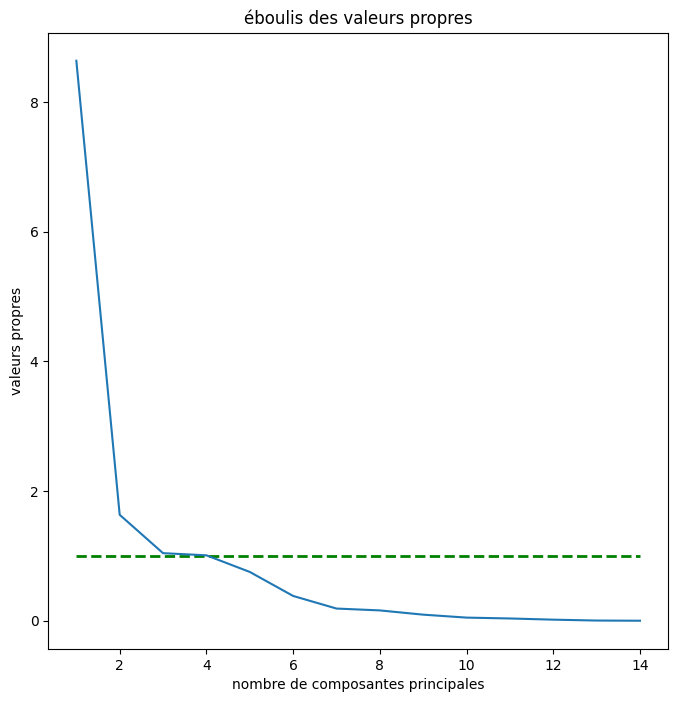

In [20]:

import matplotlib.pyplot as plt
#scree plot
figure = plt.figure(figsize=(8,8))
plt.plot([1,14],[1,1],"g--",linewidth=2)
plt.plot(numpy.arange(1,len(power.columns)+1),variance_du_composantes) 
plt.title("éboulis des valeurs propres") 
plt.ylabel("valeurs propres") 
plt.xlabel("nombre de composantes principales") 
plt.show()

COMMENTAIRE : on séléctionne les axes avant le décrochement 


<FONT COLOR="red"><B>Le graphique du cumul de variance restituée !  <B> <FONT> 

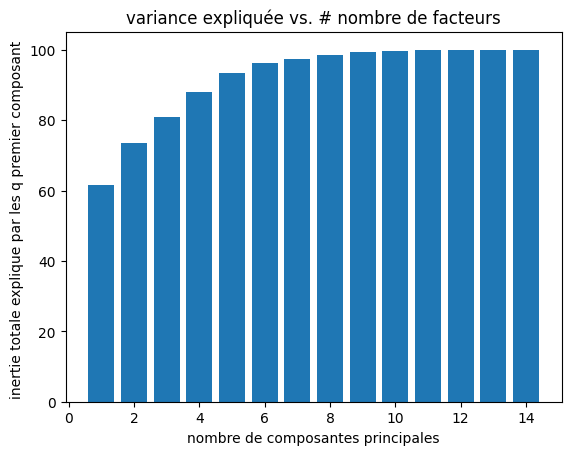

In [21]:
#cumul de variance expliquée 
plt.bar(numpy.arange(1,p+1),df['inertie_par_K_premier_composant']) 
plt.title("variance expliquée vs. # nombre de facteurs")
plt.ylabel("inertie totale explique par les q premier composant ") 
plt.xlabel("nombre de composantes principales")
plt.show()

<FONT COLOR="grenn"><B>3 . Détermination du nombre de facteur à retenir
 <B> <FONT> 

avec les 2 premiers composantes on gagne 73.373006% d'information (>60%)
    
nous choisissons K* = 2 pour pouvoir représenter les individus et les variables !

 <FONT COLOR="grenn"><B>4 . Représentation des individus – Outils pour l’interprétation
     <B> <FONT>

<B> <FONT COLOR="blue">a .Coordonnées factorielles:<FONT > <FONT COLOR="red">
Les coordonnées factorielles (Fik) des individus ont été collectées dans la variable composantes . Nous les positionnons dans le premier , le deuxieme  plan factoriel avec leurs labels pour situer et comprendre les proximités entre les individus.! <FONT ><B>

In [22]:
composantes[["F1","F2"]]

,F1,F2
United States,24.315552,9.583681
China,14.107174,-4.137795
Russia,13.522625,-5.002389
United Kingdom,0.783453,0.729259
Germany,0.628678,0.484374
...,...,...
Central African Republic,-1.215134,0.441852
Laos,-1.038043,0.294787
Bhutan,-1.221171,0.445276
Sierra Leone,-1.196014,0.421069


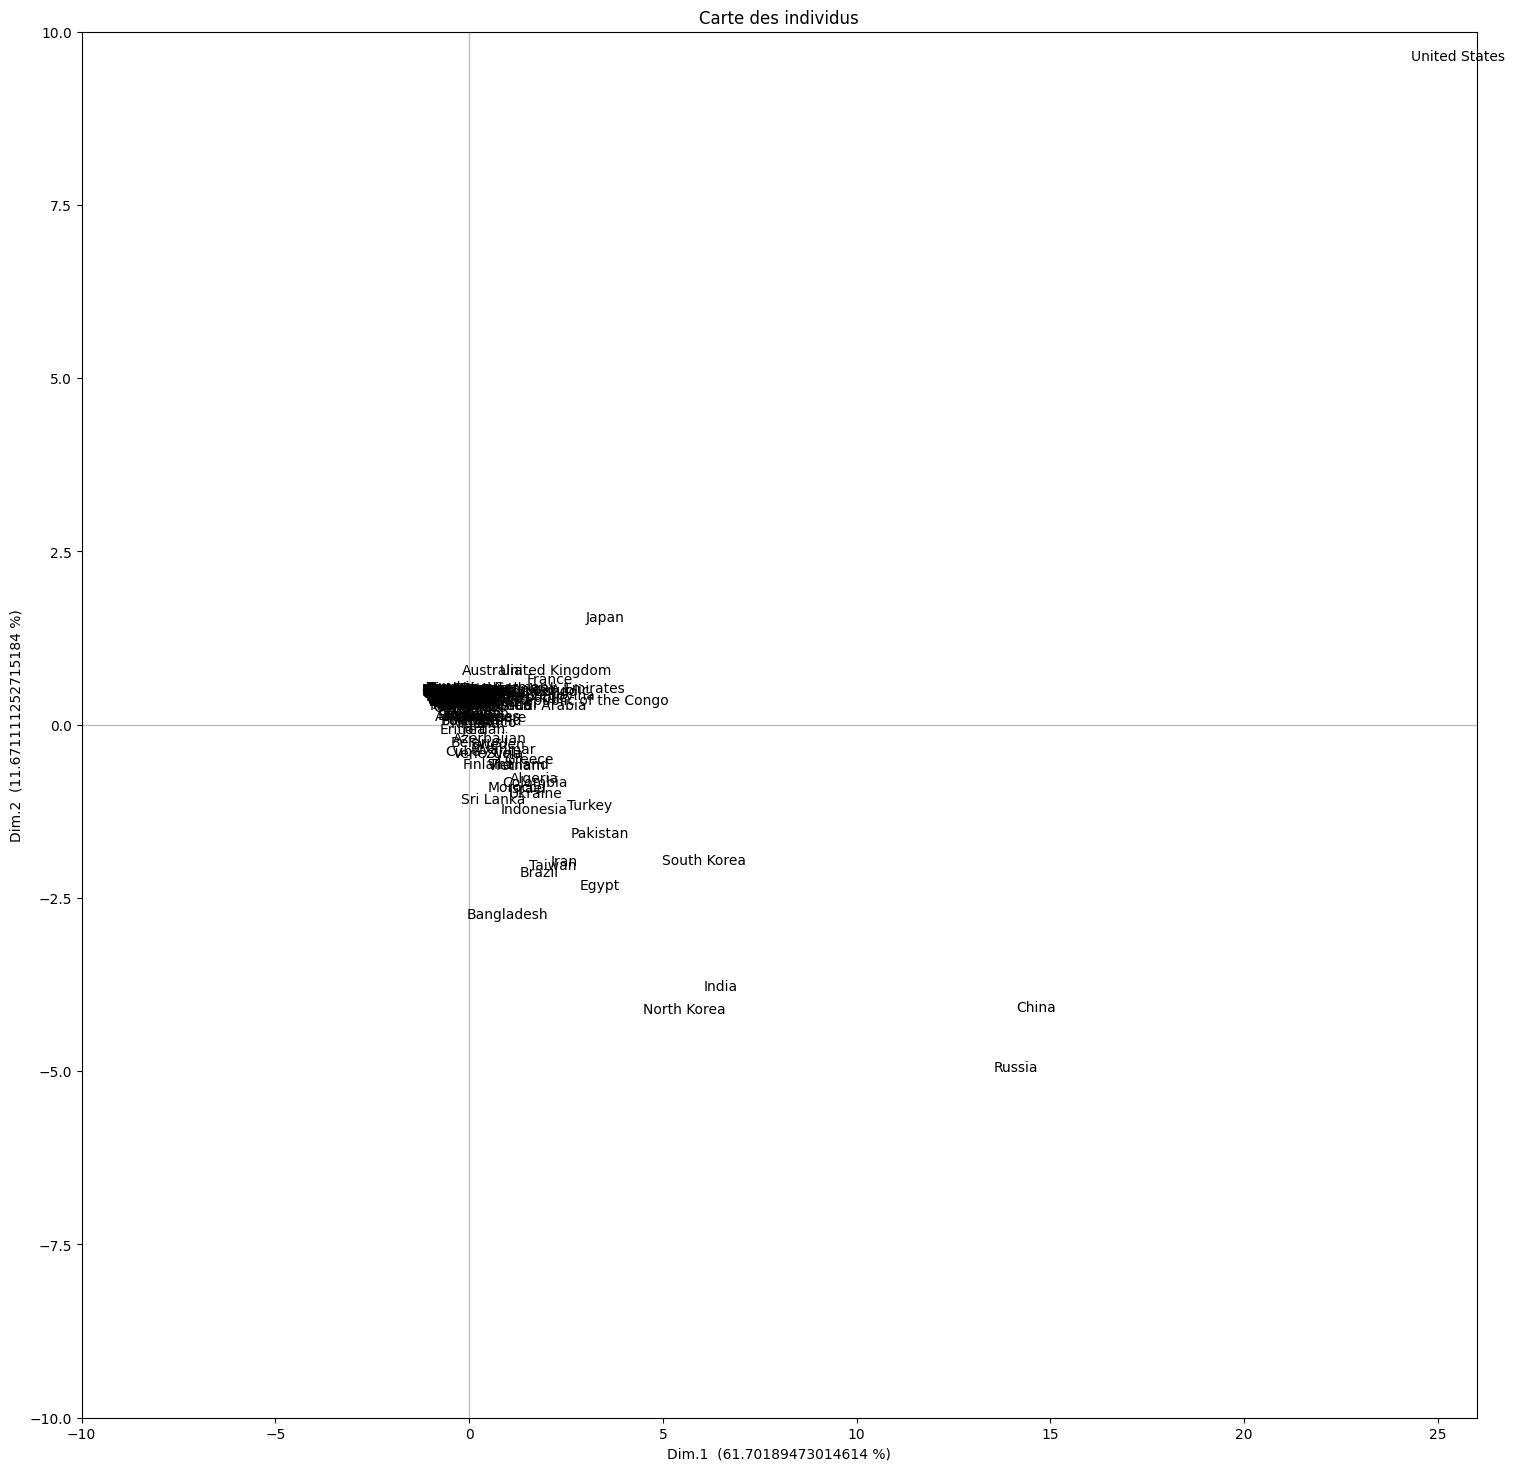

In [23]:

#positionnement des individus dans le premier plan 
fig, axes = plt.subplots(figsize=(18,18)) 
axes.set_xlim(-10,26) #même limites en abscisse 
axes.set_ylim(-10,10) #et en ordonné
x="Dim.1  ("+str(df["inertie_par_composant"][0])+" %)"
y="Dim.2  ("+str(df["inertie_par_composant"][1])+" %)"
axes.set_xlabel(x)
axes.set_ylabel(y)
#placement des étiquettes des observations
for i in range(n): 
    plt.annotate(composantes.index[i],(composantes["F1"][i],composantes["F2"][i]))

#ajouter les axes
plt.plot([-30,30],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-30,30],color='silver',linestyle='-',linewidth=1)
plt.title("Carte des individus")
#affichage
plt.show()

 <FONT COLOR="grenn"> Les pays qui sont proches ont un comportement similaire<FONT > 

<FONT COLOR="redd">a .Exemple :</FONT >   pays "taiwan", "brazil ", "iran"  sont similaires.

- l'écart entre la North Korea et la South Korea se joue plus sur l'ordonnée (Dim z) que surl'abscisse (Dim 2) 
- Bangladesh est à égale distance de North Korea et de South Korea .

<FONT COLOR="grennn"><B>Qualité de représentation – Les COS² (cosinus carré). <FONT><B>


In [37]:
# Create a list of the row sums
# Calculer la contribution de chacun des individus à chaque axe
#di: les carrés des distances à l’origine des individus
distances = power_centered_reduced.apply(lambda x: (x**2).sum(), axis=1).tolist()
Delta1=[]
Delta2=[]
cos2_sur_plan=[]
i=0
for j in composantes["F1"]:
    Delta1.append(j**2/distances[i])
    i+=1
i=0
for j in composantes["F2"]:
    Delta2.append(j**2/distances[i])
    i+=1
i=0
for j in Delta1:
    cos2_sur_plan.append(j + Delta2[i])
    i+=1

qualite_sur_les_axe=pd.DataFrame({'distances**2':distances,'Delta1': Delta1, 'Delta2': Delta2,"cos2_sur_plan":cos2_sur_plan}).set_index([country])
#qualite_sur_les_axe.sort_values(by='cos2_sur_plan', ascending=False)
qualite_sur_les_axe

,distances**2,Delta1,Delta2,cos2_sur_plan
United States,688.950080,0.858184,0.133314,0.991499
China,237.800027,0.836890,0.071999,0.908889
Russia,249.889746,0.731768,0.100140,0.831908
United Kingdom,1.694316,0.362269,0.313884,0.676153
Germany,1.977393,0.199877,0.118650,0.318527
...,...,...,...,...
Central African Republic,1.756589,0.840578,0.111144,0.951722
Laos,1.218198,0.884530,0.071334,0.955864
Bhutan,1.775090,0.840103,0.111696,0.951799
Sierra Leone,1.670329,0.856387,0.106146,0.962534


- qualité de la projection d’un individu i sur l’axe pour chaque AXE Delta
- qualité de la projection d’un individu i sur le plan forme par (Delta1,Delta2)
- la valeur du  cos2 des United States , Croatia et Belgium est proche de 1, meilleure  représentation de ces
l’individu.
- Les individus ne sont-ils pas  globalement bien projetés sur ce plan  car la valeur du  cos2 pour Mexico = 0.000835 ....


In [41]:
#contributions aux axes
lamda_1=df["variance_du_composantes"][0]
lamda_2=df["variance_du_composantes"][1]

ctr_1=[]
ctr_2=[]
i=0
#contributions relative  aux axes F1
for j in composantes["F1"]:
    ctr_1.append((j**2)/(n*lamda_1))
    i+=1
#contributions relative  aux axes F2
i=0
for j in composantes["F2"]:
    ctr_2.append((j**2)/(n*lamda_2))
    i+=1
#contributions relative  aux plan  (F1,F2)
ctr_plan=[]
i=0
for j in composantes["F1"]:
    ctr_plan.append((j**2 +composantes["F2"][i]**2)/(n*(lamda_1 + lamda_2)))
    i+=1

contributions=pd.DataFrame({'contributions relative  aux axes F1':ctr_1,'contributions relative  aux axes F2': ctr_2, 'contributions relative  aux plan  (F1,F2)': ctr_plan}).set_index([country])
#contributions.sort_values(by='contributions relative  aux axes F1', ascending=False)
#contributions.sort_values(by='contributions relative  aux axes F2', ascending=False)
contributions.sort_values(by='contributions relative  aux plan  (F1,F2)', ascending=False)

,contributions relative aux axes F1,contributions relative aux axes F2,"contributions relative aux plan (F1,F2)"
United States,0.488893,0.401510,0.474993
China,0.164560,0.074846,0.150290
Russia,0.151205,0.109392,0.144554
India,0.030239,0.064042,0.035616
North Korea,0.016614,0.075980,0.026057
...,...,...,...
Jordan,0.000033,0.000065,0.000038
Poland,0.000022,0.000000,0.000019
Spain,0.000001,0.000044,0.000007
Iraq,0.000004,0.000013,0.000006


- contribution relative d’un individu i à l’inertie de l’axe G1
- contribution relative d’un individu i à l’inertie de l’axe G2
- contribution relative d’un individu i à ’inertie du plan (G1,G2)
- United States  qui est un  déterminant pour le premier axe "0.49" 
- pour le second, nous avons United States	,Russia

<b><font color="grenn">Représentation des variables – Outils pour l’aide à l’interprétation!<font><b>

<b><font color="green">calcul La matrice de corrélation <font><b>


La matrice de corrélation est un outil qui permet de mesurer la relation entre deux variables quantitatives. Elle est représentée sous la forme d'une matrice carrée contenant des coefficients de corrélation, qui indiquent la force et la nature de la relation entre les variables. Les coefficients de corrélation varient entre -1 et 1, avec une valeur de -1 indiquant une forte corrélation négative, une valeur de 0 indiquant l'absence de corrélation et une valeur de 1 indiquant une forte corrélation positive. La matrice de corrélation peut être utilisée pour évaluer la relation entre les variables et pour prédire la valeur d'une variable à partir de la valeur de l'autre variable.

In [26]:
R=power_centered_reduced.corr()
R

,Defense Budget,Active Personnel,Reserve Personnel,Paramilitary,Aircraft Carriers,Tanks,Self-Propelled Artillery,Armored Vehicles,Helicopters,Fighters/Interceptors,Destroyers,Navy Ships,Submarines,Total Aircraft Strength
Defense Budget,1.000000,0.609741,0.230101,0.022917,-0.009903,0.523700,0.432909,0.827479,0.970139,0.972471,0.943909,0.527459,0.742301,0.972471
Active Personnel,0.609741,1.000000,0.566829,0.225347,0.037196,0.764215,0.619353,0.804118,0.616209,0.676393,0.634774,0.821792,0.852232,0.676393
Reserve Personnel,0.230101,0.566829,1.000000,0.159676,-0.031737,0.443209,0.295735,0.387505,0.285690,0.332627,0.246616,0.418435,0.391162,0.332627
Paramilitary,0.022917,0.225347,0.159676,1.000000,-0.015886,0.124747,0.041997,0.084143,0.046150,0.061064,0.035017,0.153159,0.093084,0.061064
Aircraft Carriers,-0.009903,0.037196,-0.031737,-0.015886,1.000000,-0.024175,-0.024361,-0.027098,-0.009392,-0.015031,-0.010732,0.144656,-0.023815,-0.015031
Tanks,0.523700,0.764215,0.443209,0.124747,-0.024175,1.000000,0.836629,0.807178,0.601257,0.648098,0.500034,0.706167,0.816230,0.648098
Self-Propelled Artillery,0.432909,0.619353,0.295735,0.041997,-0.024361,0.836629,1.000000,0.771747,0.460425,0.508036,0.432876,0.663044,0.810006,0.508036
Armored Vehicles,0.827479,0.804118,0.387505,0.084143,-0.027098,0.807178,0.771747,1.000000,0.836857,0.872078,0.801014,0.735576,0.892638,0.872078
Helicopters,0.970139,0.616209,0.285690,0.046150,-0.009392,0.601257,0.460425,0.836857,1.000000,0.993953,0.918483,0.543929,0.732388,0.993953
Fighters/Interceptors,0.972471,0.676393,0.332627,0.061064,-0.015031,0.648098,0.508036,0.872078,0.993953,1.000000,0.926365,0.594466,0.781919,1.000000


<b><font color="green">Un « heatmap » permet de visualiser rapidement les corrélations les plus élevées.<font><b>

Text(0.5, 1.0, 'CORELATIONS')

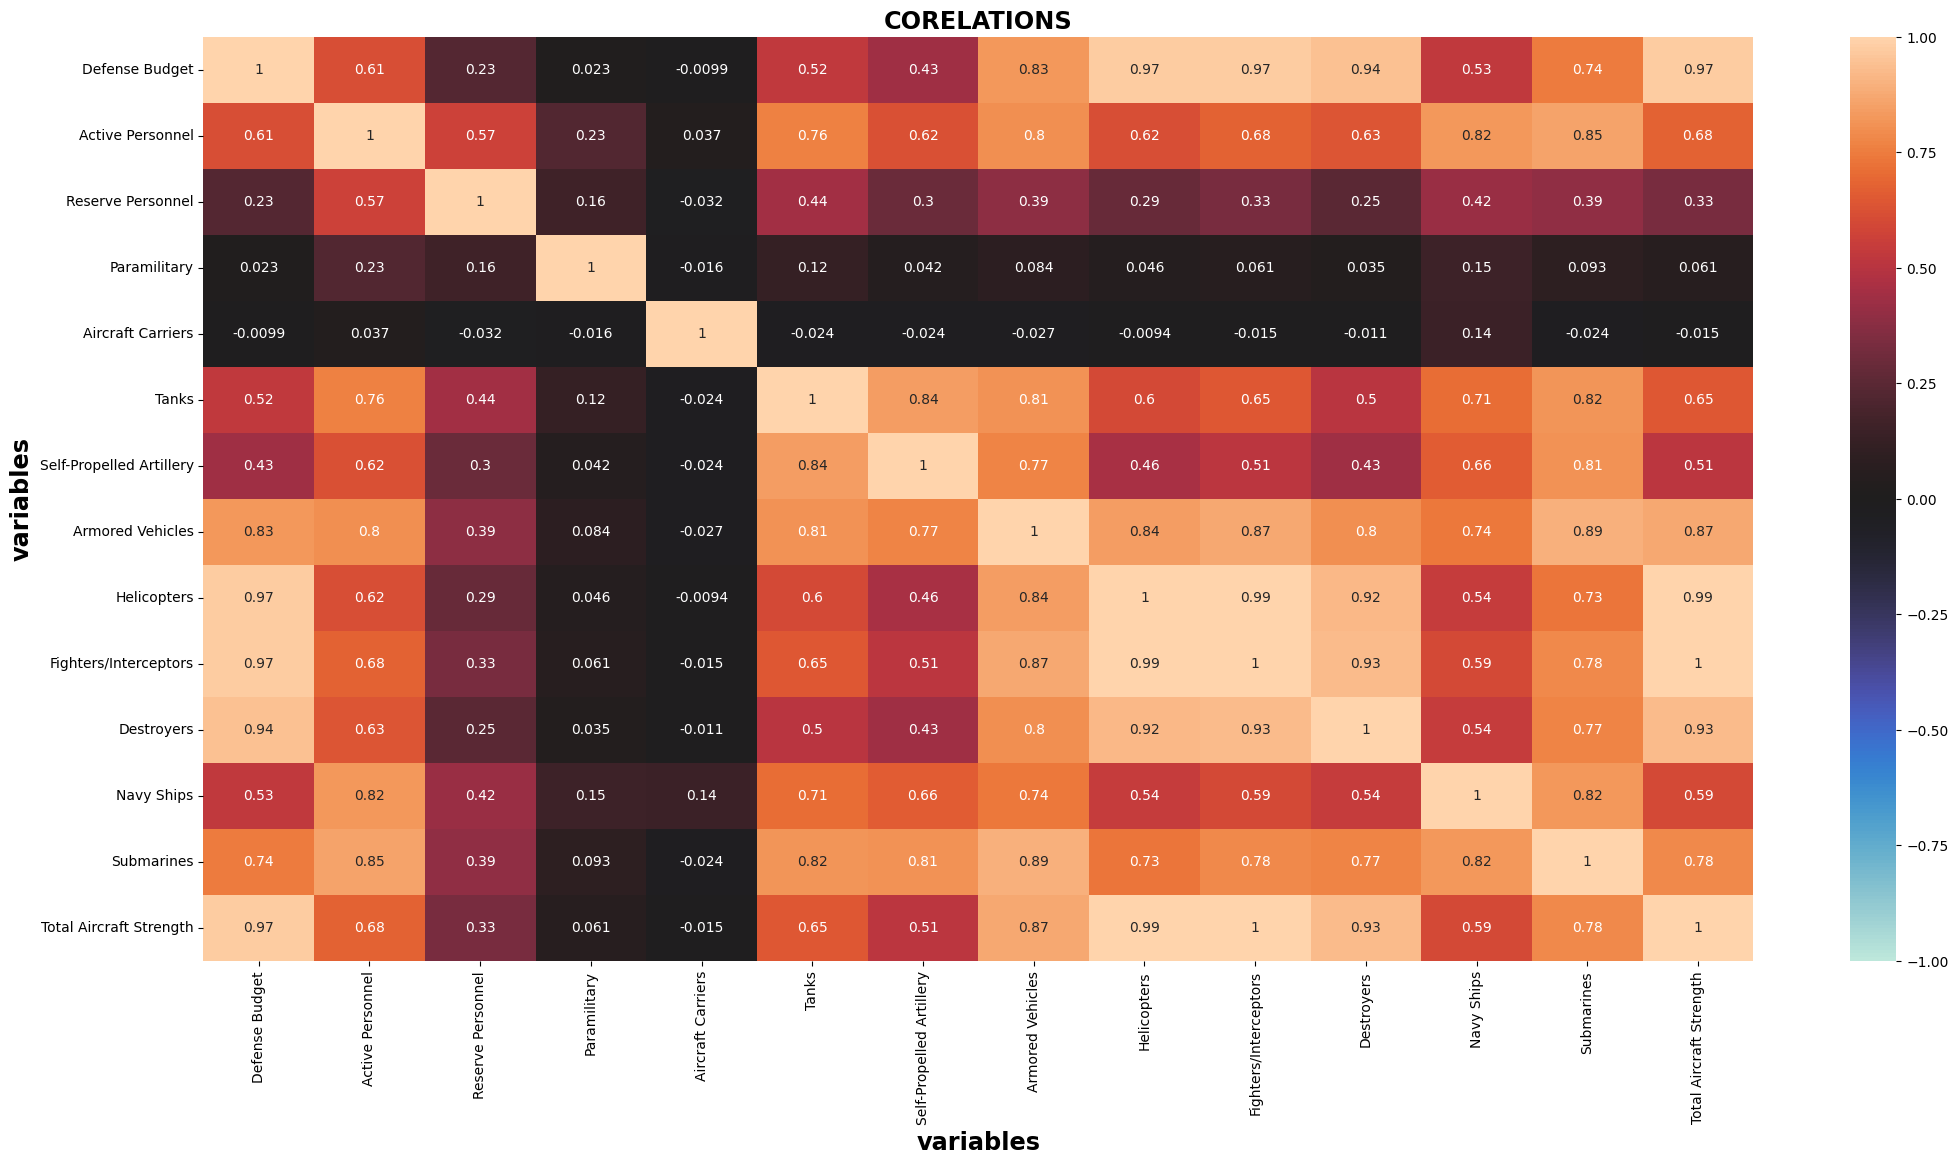

In [43]:
font = {
    'size': 'xx-large',
    'weight': 'bold'
}
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,12))
sns.heatmap(power_centered_reduced.corr(),annot = True,vmin=-1,vmax=+1,center=0,
           linecolor='w')
plt.xlabel('variables',fontdict=font)
plt.ylabel('variables',fontdict=font)
plt.title('CORELATIONS', fontdict=font)

- Nous notons que les plus fortes corrélation ont lieu entre (Helicopters,Total Aircraft Strength )
- Nous notons que absent de corrélation ont lieu entre (Aircraft Carriers	, Defense Budget )
- Nous observons également que le niveau global des Corrélation est éleve


<b><font color="green">calcule la matrice A contiennent les coordonnées des projections des variables <font><b>


In [28]:
#racine carrée des valeurs propres
sqrt_val_propr = numpy.sqrt(variance_du_composantes)

#corrélation des variables avec les axes
correlation = numpy.zeros((p,p))

for k in range(p):
    correlation[:,k] = -1*acp.components_[k,:] * sqrt_val_propr[k]

#afficher la matrice des corrélations variables x facteurs
pd.DataFrame(correlation, index=power.columns,columns = ['a{}'.format(i+1) for i in range(0,14)])

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14
Defense Budget,-0.888048,-0.431880,0.012668,-0.079791,-0.000643,-0.004859,-0.035799,-0.005034,0.026632,0.071273,0.031804,-0.100710,0.007074,0.000000
Active Personnel,-0.847883,0.347273,0.006551,-0.098233,-0.100613,-0.237760,0.102254,0.251339,0.062079,0.043509,-0.069094,0.000213,0.001366,-0.000000
Reserve Personnel,-0.449950,0.441354,0.200518,-0.185503,-0.703810,0.143127,-0.097119,-0.051102,-0.011409,-0.002652,0.009672,-0.004759,0.001313,0.000000
Paramilitary,-0.116361,0.337184,0.399237,-0.743835,0.390641,0.076894,-0.035210,-0.017240,-0.004303,-0.000446,0.004166,-0.000878,0.000073,-0.000000
Aircraft Carriers,0.001517,0.072223,-0.891936,-0.425003,-0.026009,0.128178,-0.020280,0.031932,-0.003485,0.002025,0.006807,0.002005,-0.000266,0.000000
Tanks,-0.813006,0.390625,-0.008072,0.193772,0.093985,0.235860,0.258315,0.033938,-0.105263,-0.061760,0.027053,-0.029105,0.002380,0.000000
Self-Propelled Artillery,-0.718406,0.421561,-0.087895,0.366373,0.255323,0.219339,-0.199527,-0.040967,0.021995,0.035481,-0.087261,-0.008814,-0.000749,-0.000000
Armored Vehicles,-0.957214,0.039025,-0.005445,0.095192,0.071512,0.058923,-0.036812,0.033106,0.222548,-0.077643,0.078858,0.017706,0.001177,0.000000
Helicopters,-0.905087,-0.383443,0.027750,-0.084991,-0.024649,0.090724,0.074313,-0.074434,-0.002312,0.029843,-0.034904,0.048354,0.037961,0.000000
Fighters/Interceptors,-0.937545,-0.316696,0.032781,-0.074428,-0.034546,0.068194,0.061385,-0.047567,-0.001076,0.028387,-0.017311,0.022263,-0.024961,-0.000000


<b><font color="grenn">Cercle de Corrélations entre les variables <font><b>


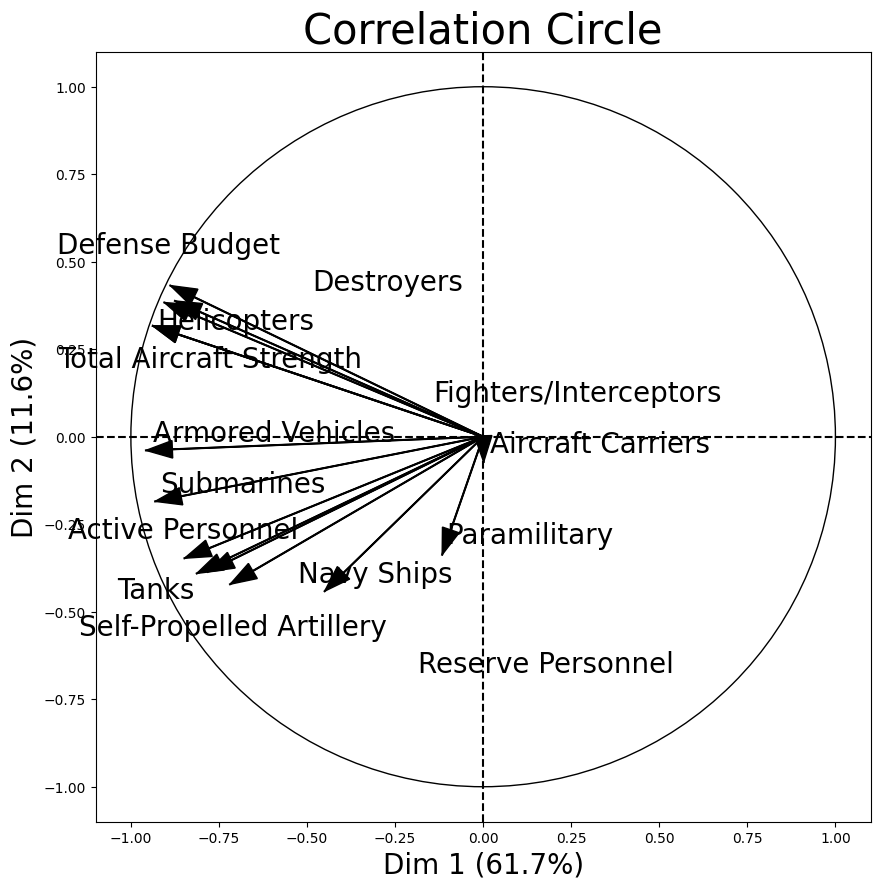

In [29]:
from mlxtend.plotting import plot_pca_correlation_graph
figure, correlation_matrix = plot_pca_correlation_graph(power_centered_reduced, power_centered_reduced.columns , dimensions=(1, 2), figure_axis_size=10)

- Nous notons que il existe une corrélation ont lieu entre (Helicopters,Total Aircraft Strength , Defense Budget)
- Nous notons que absent de corrélation ont lieu entre (Armored Vehicles	, Reserve Personnel )
- Plus on se deplace vers la gauche, on trouve les pays qui ont un grand nombre des Active Personnel et un grand nombre Armored Vehicles . C'est ce qu'on trouve dans la matrice des corrélations (les variables activeCases, TotalCases et TotalTests sont corrélés positivement et fortement avec le 1er axe).



In [30]:
correlation_matrix#les corrdones de la matrice A

,Dim 1,Dim 2
Defense Budget,-0.888048,0.431880
Active Personnel,-0.847883,-0.347273
Reserve Personnel,-0.449950,-0.441354
Paramilitary,-0.116361,-0.337184
Aircraft Carriers,0.001517,-0.072223
Tanks,-0.813006,-0.390625
Self-Propelled Artillery,-0.718406,-0.421561
Armored Vehicles,-0.957214,-0.039025
Helicopters,-0.905087,0.383443
Fighters/Interceptors,-0.937545,0.316696


<b><font color="blue"> Qualité de représentation des variables (COS²).<font color="blue"><font color="Red"> On peut calculer la qualité de
représentation des variables en montant la corrélation au carré : 𝐶𝑂𝑆2(jk) = 𝑟2(jk) <b><font>

In [31]:
#cosinus carré des variables
cos2=correlation_matrix**2
cos2['a'] = cos2.sum(axis=1)
cos2.columns=["COS2_1","COS2_2","COS_2_plan"]
cos2

,COS2_1,COS2_2,COS_2_plan
Defense Budget,0.788629,0.186520,0.975149
Active Personnel,0.718906,0.120598,0.839504
Reserve Personnel,0.202455,0.194793,0.397248
Paramilitary,0.013540,0.113693,0.127233
Aircraft Carriers,0.000002,0.005216,0.005218
Tanks,0.660979,0.152588,0.813567
Self-Propelled Artillery,0.516107,0.177714,0.693821
Armored Vehicles,0.916259,0.001523,0.917782
Helicopters,0.819183,0.147028,0.966212
Fighters/Interceptors,0.878990,0.100296,0.979286


- qualité de la projection d’un Variable i sur l’axe pour chaque AXE G1
- qualité de la projection d’un Variable i sur le plan forme par (G1,G2)
- la valeur du  cos2 des Defense Budget est proche de 1, meilleure  représentation de ce Varaible
- Les Variable ne sont-ils pas  globalement bien projetés sur ce plan  car la valeur du  cos2 pour Aircraft Carriers = 0.005218 ....


<b><font color="blue">Contribution des variables aux axes (CTR):<font color="blue"><font color="red"> La contribution est également basée sur le
carré de la corrélation, mais relativisée par l’importance de l’axe 
 <b><font>

In [44]:
lamda_3=variance_du_composantes[:2]
lamda_3 = numpy.append(lamda_3, lamda_3.sum())

ctrvar=cos2[["COS2_1","COS2_2","COS_2_plan"]]

ctrvar.columns=["Contribution d'une variables aux ax G1 ","Contribution d'une variables aux ax G2","Contribution d'une variables aux plan (G1,G2) "]
# Division de chaque colonne par les éléments de la liste
#ctrvar = ctrvar.apply(lambda x: x/lamda_3)
ctrvar = ctrvar.apply(lambda row: row / lamda_3, axis=1)

ctrvar

,Contribution d'une variables aux ax G1,Contribution d'une variables aux ax G2,"Contribution d'une variables aux plan (G1,G2)"
Defense Budget,0.091295,0.114153,0.094931
Active Personnel,0.083223,0.073808,0.081726
Reserve Personnel,0.023437,0.119216,0.038672
Paramilitary,0.001567,0.069582,0.012386
Aircraft Carriers,0.000000,0.003192,0.000508
Tanks,0.076518,0.093385,0.079201
Self-Propelled Artillery,0.059747,0.108763,0.067543
Armored Vehicles,0.106070,0.000932,0.089346
Helicopters,0.094832,0.089983,0.094061
Fighters/Interceptors,0.101755,0.061383,0.095333


- contribution relative d’un variable i à l’inertie de l’axe G1
- contribution relative d’un variable i à l’inertie de l’axe G2
- contribution relative d’un variable i à ’inertie du plan (G1,G2)
